In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data exploration

In [2]:
df = pd.read_csv("./movies.csv")
# dataframe overview
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [4]:
for i in df.columns:    
    if df[i].isna().sum() != 0:
        print(i, " has ",df[i].isna().sum(), " rows empty")

rating  has  77  rows empty
released  has  2  rows empty
score  has  3  rows empty
votes  has  3  rows empty
writer  has  3  rows empty
star  has  1  rows empty
country  has  3  rows empty
budget  has  2171  rows empty
gross  has  189  rows empty
company  has  17  rows empty
runtime  has  4  rows empty


In [32]:
# Unique values in rating column
df.rating.unique()

array(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'TV-PG', 'PG-13',
       'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [6]:
df.rating.unique()[3]

nan

In [7]:
df.rating

0         R
1         R
2        PG
3        PG
4         R
       ... 
7663    NaN
7664    NaN
7665    NaN
7666    NaN
7667    NaN
Name: rating, Length: 7668, dtype: object

In [33]:
# to obtain index of all the rows of column rating having NaN
k = df[df.rating.isna() == True].index
k

Int64Index([], dtype='int64')

### Data Cleaning

In [9]:
# removing rows where the data presence is not there in continous manner
df.drop(df[df.index == k[0]].index, inplace = True)
i = 0
while i+1 <len(k):
    if k[i] + 1 == k[i + 1]:
        
        df.drop(df[ df.index == k[i]].index, inplace = True )
    i = i + 1
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0


In [10]:
# data cleaning by removing empty values
df.ffill( axis = 0, inplace = True)

In [11]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
# check for columns where 
for index,i in enumerate(df.columns):
    if df[i].dtype == "float" and i != "score":
        print(i)
        df[i] = df[i].astype("int64")

votes
budget
gross
runtime


In [13]:
# correcting index
df.index = range(df.shape[0])
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,25818882,Notis Studio,78
7653,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,5000,13266,Roxwell Films,87
7654,Aloha Surf Hotel,Not Rated,Comedy,2020,"November 5, 2020 (United States)",7.1,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,5000,13266,Abominable Pictures,90
7655,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",7.1,14,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,13266,Dow Jazz Films,121


In [14]:
len(list(df.released))

7657

In [31]:
# getting the values from the array then reversing the string and also checking if there is any deviation by using a flag variable

In [37]:
a = []
i = 0
notfound= []
found = []
while i  < len(df.released) :
    j = len(df.released[i]) - 1
    stat = False
    while j > 0:        
        s = ""
        if df.released[i][j] == "(" and df.released[i][j - 1] == " ":             
            stat = True
            s = s + df.released[i][j - 2] + df.released[i][j - 3] + df.released[i][j - 4] + df.released[i][j - 5]             
            a.append(s)
            break
        j = j - 1
    j = 0
    if stat == False:        
        notfound.append(i)        
    else:       
        found.append(i)
    i = i + 1


In [17]:
# checking if there are any deviations which got appended
print(notfound)
len(notfound)

[]


0

In [18]:
# reversing the string and replacing the value as int data type

In [19]:
i = 0 
j = 0
reversedArr = []
while i < len(a):
    s= ""
    s = s + a[i][-1] + a[i][-2] + a[i][-3] + a[i][-4]
    reversedArr.append(int(s))
    i = i + 1


In [20]:
# result achieved
print(len(reversedArr), "is the length of reversed arr")

7657 is the length of reversed arr


In [21]:
# there is deviation in df.year as release date and the release year dont match
reversedArr == list(df.year)

False

In [22]:
len(list(df.year))

7657

In [23]:
newReleased = pd.Series(reversedArr)
newReleased

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7652    2020
7653    2020
7654    2020
7655    2020
7656    2020
Length: 7657, dtype: int64

In [24]:
df["releaseYear"] = newReleased

In [25]:
# drop any duplicates
df = df.drop_duplicates()

In [26]:
# no duplicates present
df.shape[0]

7657

#### Assumptions:
#### 1.  Budget has high correlation with gross
#### 2.  Director has high correlation with gross
#### 3.  Star has high correlation with gross
#### 4. Company has high correlation with gross
#### 5. Votes has high correlation with gross

### Vizualization

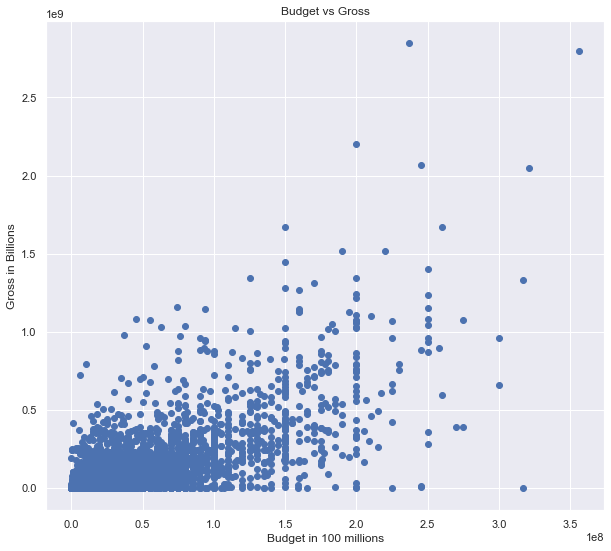

In [36]:
# correlation of Budget and gross
plt.figure(figsize = (10,9))
plt.scatter(x=  df["budget"], y = df.gross)
plt.title("Budget vs Gross")
plt.xlabel("Budget in 100 millions")
plt.ylabel("Gross in Billions")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

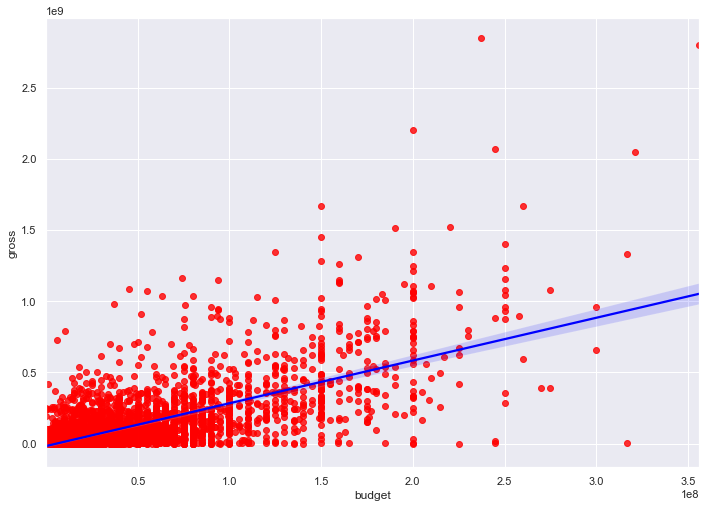

In [35]:
# correlation using seaborn
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=  df["budget"], y = df.gross, data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [34]:
# df.corr to see correlation in different columns (numerical only)
# correlation method for correlation_matrix used is pearson (default) out of  Pearson, kendall and spearman
correlation_matrix = df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime,releaseYear
year,1.000000,0.099884,0.224021,0.336821,0.262560,0.120885,0.997405
score,0.099884,1.000000,0.409497,0.080416,0.186354,0.399082,0.107738
votes,0.224021,0.409497,1.000000,0.449108,0.632606,0.309444,0.219484
budget,0.336821,0.080416,0.449108,1.000000,0.702222,0.263729,0.330232
gross,0.262560,0.186354,0.632606,0.702222,1.000000,0.244847,0.255555
runtime,0.120885,0.399082,0.309444,0.263729,0.244847,1.000000,0.120715
releaseYear,0.997405,0.107738,0.219484,0.330232,0.255555,0.120715,1.000000


#### Budget has high correlation with gross, assumption is right

Text(0.5, 1.0, 'Correlation of important factors')

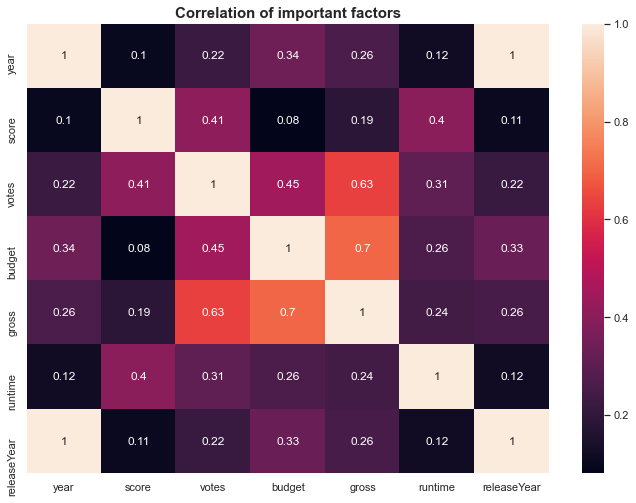

In [30]:
# creating heatmap using correlation_matrix
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation of important factors", fontsize=15, fontweight = "bold")